# Felzenszwalb and Huttenlocher method

reference: 

* paper: http://people.cs.uchicago.edu/~pff/papers/seg-ijcv.pdf

* slide: http://vision.stanford.edu/teaching/cs231b_spring1415/slides/ranjay_pres.pdf

## <center> Graph-based method:

Let $G = (V, E)$ be an undirected weight graph, where $V$ are pixels in image and edges $(v_i, v_j) \in E$ corresponding to some neighboring vertices.

$w((v_i, v_j))$ is non-negative measure of the dissimilarity between neighboring elements $v_i$ and $v_j$.

Obviously, A segementation $S$ divide $G$ into components (also called region) such that $G' = (V, E')$ and $E' \in E$ because we know the segementated image has no difference with orignial image. $G'$ may less edges since different components have partition or boundary(no edges between different components).

A $S$ is a partition of $V$ and $C \in S$. 

$S$ is a set of some sets of vertices. An element in $S$ is a $C$(a set) including some vertices. $s_i \cap s_j = \emptyset, s_i, s_j \in S, i \ne j$

We define that edges between two vertices have low weights or high weights in the same component or differnt components respectively.

## <center> Predicate

> we define a predicate, D, for evaluating whether or not there is evidence
for a boundary between two components in a segmentation (two regions of an image).

Felzenszwalb, P.F., Huttenlocher, D.P. Efficient Graph-Based Image Segmentation. International Journal of Computer Vision 59, 167–181 (2004).

* Formula 1, we define *internal difference* of a component $C$ to be the largest weight in the MST(minimum spanning tree) of the component, denote as $MST(C, E)$

    A ST(spanning tree) of a undirected weighted graph $G = (V, E)$ is a subgraph of $G$, that is $G' = (V, E')$ and it must be a tree and contain all the nodes in $G$
    
    A MST is a ST while the total weight of MST must be less or equal or other ST of a given graph. 
    
    $$
    Int(C) = \max_{e \in MST(C, E)} w(e) 
    $$
    
* Formula 2, we define the *difference between* two components $C_1$ and $C_2$ to be a weight of edges that is less or equal than all edges connecting $C_1$ and $C_2$.

    $$
    Dif(C_1, C_2) = \begin{cases}
                        \displaystyle\min w((v_i, v_j)) & \text{if } \forall v_i \in C_1, v_j \in C_2, \exists (v_i, v_j) \in E \\
                        \infty & \text{if } \forall v_i \in C_1, v_j \in C_2, \text{there is no } (v_i, v_j) \in E
                    \end{cases}
    $$

* Formula 3, the Predict D tells us if there is evidence for a boundary between two components. If D holds, then the *difference between* two components is relatively greater than *internal difference* of one of these two components. 

    $$
    D(C_i, C_2) = \begin{cases}
                    \text{true } & \text{if } Dif(C_1, C_2) > MInt(C_1, C_2) \\
                    \text{false} & \text{otherwise }
                   \end{cases} 
    $$

* Formula 4, we define the *minimum internal difference*, MInt, as

    $$
        Mint(C_1, C_2) = \min (Int(C_1) + \tau(C_1), Int(C_2) + \tau(C_2))
    $$
    
    ,where
    $$
        \tau(C) = \frac{k}{|C|}
    $$
    
    $k$ is a constant parameter, larger $k$ cause larger components. However, $k$ is not a minimum component size.
    
    The introduction of $\tau(C)$ such that we need strong evidence for small components(small nodes in component). 
    
    Why?
    
    small $C$ implies large $\tau(C)$, if two components $C_1$ and $C_2$ are small, then $Mint(C_1, C_2)$ could be large. Therefore we need larger $Dif(C_1, C_2)$
    
    The $Mint(C_1, C_2)$ is slightly different with $Int(C)$ because if $|C| = 1$ (only one vertex in $C$). clearly, $Int(C) = 0$. Since our weight measure is non-negative(take this definition.) This cause no two components will be merged in our algorithm.(You will see it soon).
    
    Don't worry How to calculate weights and The Edge set, We will cover it later. 

## <center> Definitions and properties

* Definition 1, **refinement**

    Let's say there are two segmentations $S$ and $T$. $T$ is a refinement of $S$ if each component in $T$ is a subset or equal to some component in $S$. 
    
    That is 
    
    $$
        C_s \subseteq C_t, \text{where } C_s \in  S, C_t \in T.
    $$
   
* Definition 2, **proper refinement**

    $T$ is a proper refinement of $S$, when $T \ne S$. You can think $T$ split some components in $S$.
    
* Definition 3, **too fine**

    A segmentation $S$ is too fine if $D(C_1, C_2)$ doesn't holds for some pair of component $C_1$ and $C_2$ $\in S$. No evidence of boundary.
    
* Definition 4, **too coarse**

    A segmenttation $S$ is too coarse if there exists a proper refinemnt of $S$ and it is not too fine.

* Property 1
    For any(finite) graph $G = (V, E)$ there exists some segmentation $S$ that is neither too coarse nor too fine.

## <center> Algorithm

* Algorithm:
    Given a graph $G = (V, E)$ as input, This algorithm will output a segmentation $S = (C_1, C_2,...,C_n)$
    
    1. Sort edge set $E$ into non-decreasing order on weight. $\pi = (o_1, o_2,..., o_m)$, $o_n$ is the edge.
    
    2. Set initial segmentation $S^0$, each vertex in $V$ is a component. That is $|S^0| = |V|$
    
    3. Repeat 4 for q in 1,...,m
    
    4. We obtain $S^q$ from $S^{q-1}$ as follows. 
        
        We have $o_q = (v_i, v_j)$.
   
        Let $C_i^{q-1}$ and $C_j^{q-1}$  be the components of $S^{q-1}$ contain $v_i$ and $v_j$ respectively. If $C_i^{q-1} \ne C_j^{q-1}$ and $w(o_q) \le MInt(C_i^{q-1}, C_j^{q-1})$. This tell use There is no evidence for a bounday between $C_i^{q-1}$ and $C_j^{q-1}$.
 
        $S^q$ is obtained from $S^{q-1}$ by merging $C_i^{q-1}$ and $C_j^{q-1}$. Otherwise, $S^q = S^{q-1}$
        
    5. Return $S = S^m$

* merge only happens when $w \lt MINT$, $MINT$ depends on $INT$, $w$ can be greater than $INT$

* wight of edge to cause merge won't less than current edge in a component, because we sort weight. 

* so every time we merge, the result component must be a MST

## <center> Time complexity

1. [Disjoint set](https://algorithms.tutorialhorizon.com/disjoint-set-data-structure-union-find-algorithm/)

2. [Union by rank and path compression](https://algorithms.tutorialhorizon.com/disjoint-set-union-find-algorithm-union-by-rank-and-path-compression/)

We use disjoint set with union by rank and path compression to merge component.

Keep tract of INT of each component

## <center> Lemma and Theorem

* Lemma: 

    In step4, if two components are not merged. Then one of the components will in the final segementation $S$.
    
* Theorem1:

    The output segementation $S$ by algorithm is neither too fine nor too coarse.
    
* Theorem2:
    
    The output segementation $S$ by alogrithm doesn't depend on which non-decreasing order used.

## <center> weight calculation, edges and some details

### Using Grid Graph

We only concer vertices in same channel. That is we do the following computation on each individual channel.

**Generate Grid Graphs:**

We already know the $V$ in input graph $G = (V, E)$ contains all pixels of a image. We connect pairs of pixels that are neighbors in an
8-connected sense. That is, If we use $v_(i, j, k)$ to denote a vertex in i'th row, j'th column, k'th channel(channel last in here), then there edges between
    $$
    v_(i, j, k) \text{and } v_(i-1, j, k),
    $$
    $$
    v_(i, j, k) \text{and } v_(i+1, j, k), 
    $$
    $$
    v_(i, j, k) \text{and } v_(i, j-1, k), 
    $$
    $$
    v_(i, j, k) \text{and } v_(i, j+1, k)
    $$   
 
**calculate weights**  

Only consider vertices in same channel.
 
We use the same notation of a vertex. $w(v_i, v_j) = |I_i - I_j|$, where $I$ is the intensity of a pixel, the value when you use array to represent a image. 
 
**Preprocessing** 
 
Use Gaussian filter to smooth the image with $\sigma= 0.8$. A way to blur your image or remove noise.

Just think Gaussian filter is the same as filter in convolutional layer...
 
https://computergraphics.stackexchange.com/questions/39/how-is-gaussian-blur-implemented 
 
**image has more than one channel**

If the image has three channels(Red, Green, Blue), then we do these process on each channel. We will get three segementations $S_R$, $S_G$ and $S_B$ represent the segementations obtained from Red, Green and Blue channel respectively. We put two pixels in a same components if these two pixels are in the same components in all three segementations.

**parameters**

the only parameter we need to set in this algorithm is $k$ in $\tau(C) = \frac{k}{|C|}$.

The value of $k$ used in paper is $150$ if the image is $128 * 128$, $k$ is $300$ when the image is $320 * 240$.
 
### Using Nearest Neighbor Graphs

**Generate Nearest Neighbor Graphs:**

Rather than connect pixels within 8-connected sense. There are many ways to determine where two pixels are connected. This paper connects each point to a $k$ nearest neighbors, where nearest neighbors are determined by weights. Less weights means closer. Alternatively, we can connect all neighbors within a distance $d$. 

They use ANN(approximate nearest neighbor) algorithm to find the nearest neighbors for each point. In paper, they use $k = 10$.

ANN method : S. Arya and D. M. Mount. Approximate nearest neighbor searching. Proc. 4th
Annual ACM-SIAM Symposium on Discrete Algorithms, pages 271-280, 1993.


**calculate weights**

We map each pixel into a feature space. That is given a pixel, there is a function $f(pixel) = \text{feature vector}$,  then we use this feature vector to determine how pixel are connected. 

Note there are many other ways to choose map functions and calculate weights.

In this paper, authors use $f(pixel) = (x, y, r, g, b)$, where $(x, y)$ is the location of pixel in image, x'th row and y'th column. $(r, g, b)$ is the color value of the pixel. For the weight, they use L2(Euclidean) distance to calculate weight between two point.

**parameters**

$k=150$ for small image, $k = 300$ for large image.

$\sigma = 0.8$

In [34]:
!conda install -c conda-forge python-annoy --yes

Solving environment: done

# All requested packages already installed.



In [35]:
!conda install -f matplotlib --yes



         See 'conda install --help' for details about the --force-reinstall
         and --clobber flags.


Solving environment: done

## Package Plan ##

  environment location: /srv/conda/envs/notebook

  added / updated specs:
    - matplotlib



Preparing transaction: done
Verifying transaction: done
Executing transaction: done


In [36]:
!conda install -c conda-forge opencv --yes

Solving environment: done

## Package Plan ##

  environment location: /srv/conda/envs/notebook

  added / updated specs:
    - opencv


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    liblapacke-3.9.0           |       7_openblas          11 KB  conda-forge
    libopencv-4.5.0            |   py38h703c3c0_7        34.4 MB  conda-forge
    opencv-4.5.0               |   py38h578d9bd_7          22 KB  conda-forge
    py-opencv-4.5.0            |   py38h81c977d_7         1.1 MB  conda-forge
    ------------------------------------------------------------
                                           Total:        35.6 MB

The following NEW packages will be INSTALLED:

  liblapacke         conda-forge/linux-64::liblapacke-3.9.0-7_openblas
  libopencv          conda-forge/linux-64::libopencv-4.5.0-py38h703c3c0_7
  opencv             conda-forge/linux-64::opencv-4.5.0-py38h578d9bd_7
  py-opencv  

------------------------------------------
grid type graph construction done
------------------------------------------
------------------------------------------
processing 0'th channel of Grid Graph
------------------------------------------
------------------------------------------
processing 1'th channel of Grid Graph
------------------------------------------
------------------------------------------
processing 2'th channel of Grid Graph
------------------------------------------
-----------------
Segmentation done
-----------------


/home/jovyan/Efficient_Graph-based_Image_Segmentation/disjoint_set.py:73: RuntimeWarning: overflow encountered in long_scalars
  self._arr[yp][2] += self._arr[xp][2]


--------------------
colouring image done
--------------------


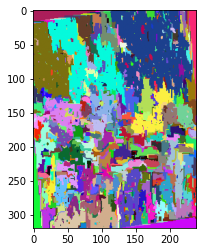

In [8]:
import segmentation as seg    #import library
from skimage import transform
import matplotlib.pyplot as plt
import numpy as np

path = './data/7E51DF6E-A2BD-48AE-A311-D41F989CD190_1_105_c_jpeg.rf.6c8d8627fafd0955bb8369f67b964cb1.jpg'  #read image
img = plt.imread(path).astype(np.int32)
img = transform.resize(img, (320, 240), preserve_range=True)
#plt.imshow(img)
grid_graphs = seg.generate_graph(img)
Segs = seg.segmentation(grid_graphs, img.shape[0], img.shape[1], k=100)
segmented_img= seg.draw_img(Segs, img.shape[0], img.shape[1])

plt.imshow(segmented_img)

Populating the interactive namespace from numpy and matplotlib


/srv/conda/envs/notebook/lib/python3.8/site-packages/IPython/core/magics/pylab.py:159: UserWarning: pylab import has clobbered these variables: ['gradient']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


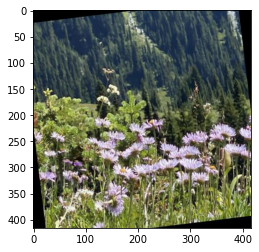

In [37]:
%pylab inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img = mpimg.imread(path)
imgplot = plt.imshow(img)
plt.show()

Felzenszwalb number of segments: 703
SLIC number of segments: 184
Quickshift number of segments: 1390


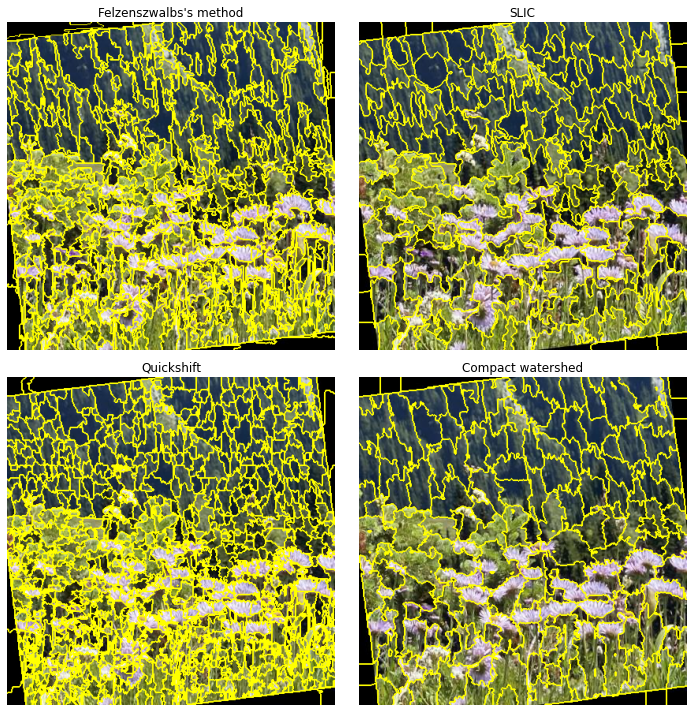

In [38]:
import matplotlib.pyplot as plt
import numpy as np

from skimage.data import astronaut
from skimage.color import rgb2gray
from skimage.filters import sobel
from skimage.segmentation import felzenszwalb, slic, quickshift, watershed
from skimage.segmentation import mark_boundaries
from skimage.util import img_as_float

img =  mpimg.imread(path)

segments_fz = felzenszwalb(img, scale=100, sigma=0.5, min_size=50)
segments_slic = slic(img, n_segments=250, compactness=10, sigma=1,
                     start_label=1)
segments_quick = quickshift(img, kernel_size=3, max_dist=6, ratio=0.5)
gradient = sobel(rgb2gray(img))
segments_watershed = watershed(gradient, markers=250, compactness=0.001)

print(f"Felzenszwalb number of segments: {len(np.unique(segments_fz))}")
print(f"SLIC number of segments: {len(np.unique(segments_slic))}")
print(f"Quickshift number of segments: {len(np.unique(segments_quick))}")

fig, ax = plt.subplots(2, 2, figsize=(10, 10), sharex=True, sharey=True)

ax[0, 0].imshow(mark_boundaries(img, segments_fz))
ax[0, 0].set_title("Felzenszwalbs's method")
ax[0, 1].imshow(mark_boundaries(img, segments_slic))
ax[0, 1].set_title('SLIC')
ax[1, 0].imshow(mark_boundaries(img, segments_quick))
ax[1, 0].set_title('Quickshift')
ax[1, 1].imshow(mark_boundaries(img, segments_watershed))
ax[1, 1].set_title('Compact watershed')

for a in ax.ravel():
    a.set_axis_off()

plt.tight_layout()
plt.savefig('sg-methods-meadow.png' , bbox_inches='tight')
plt.show()

maskSLIC Demonstration
This example is about comparing the segmentations obtained using the plain SLIC method 1 and its masked version maskSLIC 2.

The maskSLIC method is an extension of the SLIC method for the generation of superpixels in a region of interest. maskSLIC is able to overcome border problems that affects SLIC method, particularely in case of irregular mask.

1
Radhakrishna Achanta, Appu Shaji, Kevin Smith, Aurelien Lucchi, Pascal Fua, and Sabine Suesstrunk, SLIC Superpixels Compared to State-of-the-art Superpixel Methods, TPAMI, May 2012. DOI:10.1109/TPAMI.2012.120

2
Irving, Benjamin. “maskSLIC: regional superpixel generation with application to local pathology characterisation in medical images.”, 2016, , arXiv:1606.09518

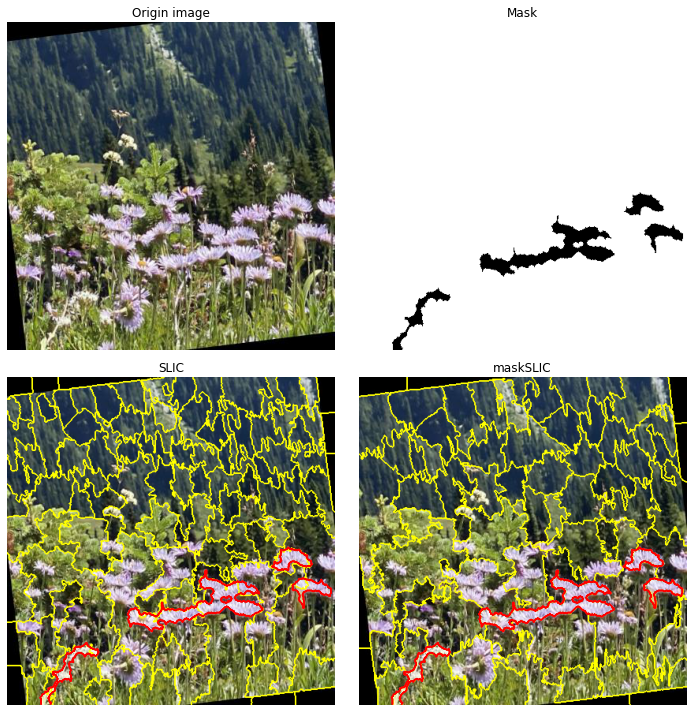

In [39]:
import matplotlib.pyplot as plt

from skimage import data
from skimage import color
from skimage import morphology
from skimage import segmentation

# Input data
img =   mpimg.imread(path)

# Compute a mask
lum = color.rgb2gray(img)
mask = morphology.remove_small_holes(
    morphology.remove_small_objects(
        lum < 0.7, 500),
    500)

mask = morphology.opening(mask, morphology.disk(3))

# SLIC result
slic = segmentation.slic(img, n_segments=200, start_label=1)

# maskSLIC result
m_slic = segmentation.slic(img, n_segments=100, mask=mask, start_label=1)

# Display result
fig, ax_arr = plt.subplots(2, 2, sharex=True, sharey=True, figsize=(10, 10))
ax1, ax2, ax3, ax4 = ax_arr.ravel()

ax1.imshow(img)
ax1.set_title("Origin image")

 

ax2.imshow(mask, cmap="gray")
ax2.set_title("Mask")

ax3.imshow(segmentation.mark_boundaries(img, slic))
ax3.contour(mask, colors='red', linewidths=1)
ax3.set_title("SLIC")

ax4.imshow(segmentation.mark_boundaries(img, m_slic))
ax4.contour(mask, colors='red', linewidths=1)
ax4.set_title("maskSLIC")

for ax in ax_arr.ravel():
    ax.set_axis_off()

plt.tight_layout()
plt.savefig('slic-mask-meadow.png' , bbox_inches='tight')
plt.show()



/srv/conda/envs/notebook/lib/python3.8/site-packages/skimage/io/_plugins/matplotlib_plugin.py:150: UserWarning: Float image out of standard range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


labels [[  1   1   1 ...  18  18  18]
 [  1   1   1 ...  18  18  18]
 [  1   1   1 ...  18  18  18]
 ...
 [376 376 376 ... 373 373 373]
 [376 376 376 ... 373 373 373]
 [376 376 376 ... 373 373 373]]
labels [[ 0  0  0 ...  1  1  1]
 [ 0  0  0 ...  1  1  1]
 [ 0  0  0 ...  1  1  1]
 ...
 [70 70 70 ... 86 86 86]
 [70 70 70 ... 86 86 86]
 [70 70 70 ... 86 86 86]]
out (416, 416, 3)


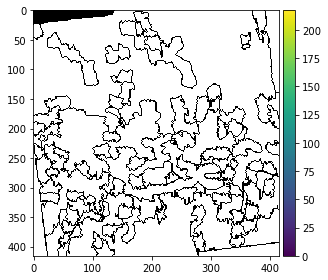

In [42]:
from skimage import data, io, segmentation, color
from skimage.future import graph
import numpy as np

def rag_mean_color(image, labels, calc_weight, connectivity=2, sigma=255.0):
    graph = sk_graph.RAG(labels, connectivity=connectivity)

    for n in graph:
        graph.nodes[n].update({
            'labels': [n],
            'pixel count': 0,
            'total color': np.array([0, 0, 0], dtype=np.double)
        })

    for index in np.ndindex(labels.shape):
        current = labels[index]
        graph.nodes[current]['pixel count'] += 1
        graph.nodes[current]['total color'] += image[index]

    for n in graph:
        graph.nodes[n]['mean color'] = (graph.nodes[n]['total color'] /
                                        graph.nodes[n]['pixel count'])

    for x, y, d in graph.edges(data=True):
        d['weight'] = calc_weight(graph.nodes[x]['mean color'], graph.nodes[y]['mean color'])

    return graph

def _weight_mean_color(graph, src, dst, n):
    """Callback to handle merging nodes by recomputing mean color.

    The method expects that the mean color of `dst` is already computed.

    Parameters
    ----------
    graph : RAG
        The graph under consideration.
    src, dst : int
        The vertices in `graph` to be merged.
    n : int
        A neighbor of `src` or `dst` or both.

    Returns
    -------
    data : dict
        A dictionary with the `"weight"` attribute set as the absolute
        difference of the mean color between node `dst` and `n`.
    """

    diff = graph.nodes[dst]['mean color'] - graph.nodes[n]['mean color']
    diff = np.linalg.norm(diff)
    return {'weight': diff}


def merge_mean_color(graph, src, dst):
    """Callback called before merging two nodes of a mean color distance graph.

    This method computes the mean color of `dst`.

    Parameters
    ----------
    graph : RAG
        The graph under consideration.
    src, dst : int
        The vertices in `graph` to be merged.
    """
    graph.nodes[dst]['total color'] += graph.nodes[src]['total color']
    graph.nodes[dst]['pixel count'] += graph.nodes[src]['pixel count']
    graph.nodes[dst]['mean color'] = (graph.nodes[dst]['total color'] /
                                      graph.nodes[dst]['pixel count'])


img = mpimg.imread(path)
labels = segmentation.slic(img, compactness=30, n_segments=400, start_label=1)
g = graph.rag_mean_color(img, labels)
shape(img)
print('labels',labels)
labels2 = graph.merge_hierarchical(labels, g, thresh=35, rag_copy=False,
                                   in_place_merge=True,
                                   merge_func=merge_mean_color,
                                   weight_func=_weight_mean_color)
print('labels',labels2)
out = color.label2rgb(labels2, img, kind='avg', bg_label=0)
out = segmentation.mark_boundaries(out, labels2, (0, 0, 0))



print('out',shape(out))
io.imshow(out)
#plt.savefig('rag-meadow.png' , bbox_inches='tight')
#io.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


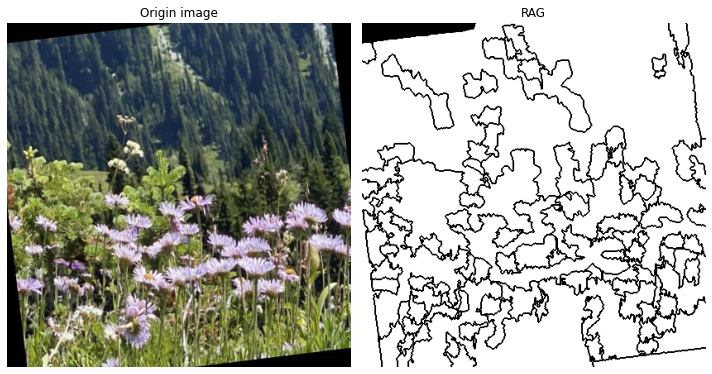

In [43]:
# Display result
fig, ax_arr = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(10, 10))
ax1, ax2 = ax_arr.ravel()

ax1.imshow(img)
ax1.set_title("Origin image")

 

ax2.imshow(out)
ax2.set_title("RAG")



for ax in ax_arr.ravel():
    ax.set_axis_off()

plt.tight_layout()
plt.savefig('rag-meadow.png' , bbox_inches='tight')

In [28]:
out

array([[[0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        ...,
        [3.63816382, 4.63366337, 5.64851485],
        [3.63816382, 4.63366337, 5.64851485],
        [3.63816382, 4.63366337, 5.64851485]],

       [[0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        ...,
        [3.63816382, 4.63366337, 5.64851485],
        [3.63816382, 4.63366337, 5.64851485],
        [3.63816382, 4.63366337, 5.64851485]],

       [[0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        ...,
        [3.63816382, 4.63366337, 5.64851485],
        [3.63816382, 4.63366337, 5.64851485],
        [3.63816382, 4.63366337, 5.64851485]],

       ...,

       [[5.12784314, 4.94392157, 3.53921569],
        [5.12784314, 4.94392157, 3.53921569],
        [5.12784314, 4